In [1]:
# Get the data for expeirment
import sklearn
import pandas as pd 

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data\processed_wind_small.txt')
data

,Date,A_Air_temp,A_Precip,A_Syno_wind_speed,A_Syno_wind_dir,A_Avg_wind_speed,A_Avg_wind_dir,B_Air_temp,B_Precip,B_Syno_wind_speed,...,E_Syno_wind_speed,E_Syno_wind_dir,E_Avg_wind_speed,E_Avg_wind_dir,Test_Air_temp,Test_Precip,Test_Syno_wind_speed,Test_Syno_wind_dir,Test_Avg_wind_speed,Test_Avg_wind_dir
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,333.6,7.2,315.9,-9.2,0.0,8.8,338.5,8.8,338.6
1,2017-01-01 01:00:00,-9.5,0.0,2.4,325.8,9.3,331.0,NaN,NaN,NaN,...,7.9,238.4,6.9,273.2,-9.5,0.0,11.1,334.3,12.6,332.2
2,2017-01-01 02:00:00,-9.3,0.0,2.9,314.5,10.4,315.0,NaN,NaN,NaN,...,12.0,279.6,9.9,267.0,-9.2,0.0,6.3,309.0,8.0,325.9
3,2017-01-01 03:00:00,-9.0,0.0,3.2,309.9,11.0,309.0,NaN,NaN,NaN,...,14.0,316.3,13.6,308.9,-8.8,0.0,5.7,307.2,7.3,307.5
4,2017-01-01 04:00:00,-8.9,0.0,4.1,310.4,11.4,311.0,NaN,NaN,NaN,...,19.1,290.6,16.5,295.4,-8.6,0.0,12.6,317.5,9.1,309.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4362,2017-07-01 19:00:00,18.3,0.0,3.4,185.0,2.4,197.0,NaN,NaN,NaN,...,8.1,116.2,4.6,144.7,18.1,0.0,4.7,146.1,3.1,198.7
4363,2017-07-01 20:00:00,18.3,0.0,6.9,118.0,7.4,136.0,NaN,NaN,NaN,...,6.4,135.1,7.1,139.5,18.4,0.0,5.1,101.2,5.3,118.8
4364,2017-07-01 21:00:00,16.4,0.0,6.0,197.0,6.0,147.0,NaN,NaN,NaN,...,4.8,167.3,4.0,143.5,17.0,0.0,4.4,182.6,4.1,155.9
4365,2017-07-01 22:00:00,15.4,0.0,9.2,200.0,7.5,196.0,NaN,NaN,NaN,...,6.3,247.5,4.6,218.8,15.8,0.0,3.9,186.5,5.3,172.4


In [3]:
data.isnull().sum()

Date                       0
A_Air_temp                 1
A_Precip                   1
A_Syno_wind_speed          1
A_Syno_wind_dir            2
A_Avg_wind_speed           1
A_Avg_wind_dir             3
B_Air_temp              4367
B_Precip                4367
B_Syno_wind_speed       4367
B_Syno_wind_dir         4367
B_Avg_wind_speed        4367
B_Avg_wind_dir          4367
C_Air_temp                 0
C_Precip                   0
C_Syno_wind_speed          0
C_Syno_wind_dir           24
C_Avg_wind_speed        4367
C_Avg_wind_dir          4367
D_Air_temp                 0
D_Precip                   0
D_Syno_wind_speed          0
D_Syno_wind_dir           69
D_Avg_wind_speed           0
D_Avg_wind_dir            69
E_Air_temp                 0
E_Precip                   0
E_Syno_wind_speed          0
E_Syno_wind_dir            0
E_Avg_wind_speed           0
E_Avg_wind_dir             0
Test_Air_temp              0
Test_Precip                0
Test_Syno_wind_speed       0
Test_Syno_wind

In [4]:
col_to_drop = [
    'B_Syno_wind_speed',
    'B_Syno_wind_dir',
    'B_Avg_wind_speed',
    'B_Avg_wind_dir',
    'C_Avg_wind_speed',
    'C_Avg_wind_dir'
]

processed_data = data.drop(columns=col_to_drop)

In [5]:
train, test = train_test_split(processed_data, test_size=0.3)

train = train.fillna(0)
test = test.fillna(0)

train_x = train.loc[:, [
    'A_Air_temp', 'A_Precip', 'A_Syno_wind_speed',
       'A_Syno_wind_dir', 'A_Avg_wind_speed', 'A_Avg_wind_dir', 'B_Air_temp',
       'B_Precip', 'C_Air_temp', 'C_Precip', 'C_Syno_wind_speed',
       'C_Syno_wind_dir', 'D_Air_temp', 'D_Precip', 'D_Syno_wind_speed',
       'D_Syno_wind_dir', 'D_Avg_wind_speed', 'D_Avg_wind_dir', 'E_Air_temp',
       'E_Precip', 'E_Syno_wind_speed', 'E_Syno_wind_dir', 'E_Avg_wind_speed',
       'E_Avg_wind_dir'
]] 
train_y = train.loc[:, [
    'Test_Avg_wind_speed',
      # 'Test_Avg_wind_dir'
]]

test_x = test.loc[:, [
    'A_Air_temp', 'A_Precip', 'A_Syno_wind_speed',
       'A_Syno_wind_dir', 'A_Avg_wind_speed', 'A_Avg_wind_dir', 'B_Air_temp',
       'B_Precip', 'C_Air_temp', 'C_Precip', 'C_Syno_wind_speed',
       'C_Syno_wind_dir', 'D_Air_temp', 'D_Precip', 'D_Syno_wind_speed',
       'D_Syno_wind_dir', 'D_Avg_wind_speed', 'D_Avg_wind_dir', 'E_Air_temp',
       'E_Precip', 'E_Syno_wind_speed', 'E_Syno_wind_dir', 'E_Avg_wind_speed',
       'E_Avg_wind_dir'
]] 
test_y = test.loc[:, [
    'Test_Avg_wind_speed',
      # 'Test_Avg_wind_dir'
]]


In [6]:
train.isnull().sum()

Date                    0
A_Air_temp              0
A_Precip                0
A_Syno_wind_speed       0
A_Syno_wind_dir         0
A_Avg_wind_speed        0
A_Avg_wind_dir          0
B_Air_temp              0
B_Precip                0
C_Air_temp              0
C_Precip                0
C_Syno_wind_speed       0
C_Syno_wind_dir         0
D_Air_temp              0
D_Precip                0
D_Syno_wind_speed       0
D_Syno_wind_dir         0
D_Avg_wind_speed        0
D_Avg_wind_dir          0
E_Air_temp              0
E_Precip                0
E_Syno_wind_speed       0
E_Syno_wind_dir         0
E_Avg_wind_speed        0
E_Avg_wind_dir          0
Test_Air_temp           0
Test_Precip             0
Test_Syno_wind_speed    0
Test_Syno_wind_dir      0
Test_Avg_wind_speed     0
Test_Avg_wind_dir       0
dtype: int64

In [7]:
test

,Date,A_Air_temp,A_Precip,A_Syno_wind_speed,A_Syno_wind_dir,A_Avg_wind_speed,A_Avg_wind_dir,B_Air_temp,B_Precip,C_Air_temp,...,E_Syno_wind_speed,E_Syno_wind_dir,E_Avg_wind_speed,E_Avg_wind_dir,Test_Air_temp,Test_Precip,Test_Syno_wind_speed,Test_Syno_wind_dir,Test_Avg_wind_speed,Test_Avg_wind_dir
751,2017-02-01 07:00:00,-8.0,0.0,3.5,308.1,11.2,303.0,0.0,0.0,-8.8,...,13.3,291.1,14.0,284.6,-8.0,0.0,10.7,309.3,10.8,300.3
2134,2017-03-30 23:00:00,2.5,0.0,1.9,211.8,5.8,219.0,0.0,0.0,2.2,...,7.8,217.2,4.3,202.0,3.1,0.0,2.8,169.5,4.9,197.0
3319,2017-05-19 08:00:00,11.3,0.0,1.9,197.2,5.9,186.0,0.0,0.0,11.3,...,5.2,180.1,6.6,154.5,10.7,0.0,5.8,173.8,5.6,177.4
3074,2017-05-09 03:00:00,10.5,0.0,0.8,328.4,7.1,348.0,0.0,0.0,8.6,...,5.4,325.4,9.1,347.0,9.7,0.0,2.1,283.9,3.9,291.9
3110,2017-05-10 15:00:00,18.9,0.0,4.8,62.4,14.2,83.0,0.0,0.0,20.3,...,17.4,102.5,14.4,99.9,19.8,0.0,10.5,82.3,14.9,95.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,2017-06-29 08:00:00,15.4,0.0,3.5,246.5,11.6,241.0,0.0,0.0,14.6,...,15.0,228.6,12.6,226.7,14.6,0.0,10.7,246.4,9.4,242.2
4111,2017-06-21 08:00:00,13.3,0.0,26.0,300.0,26.4,296.0,0.0,0.0,12.2,...,38.2,285.7,33.1,282.6,12.7,0.0,24.8,300.3,23.7,295.7
2201,2017-04-02 18:00:00,8.9,0.0,5.1,298.9,21.1,303.0,0.0,0.0,8.2,...,20.4,287.6,24.1,285.7,8.6,0.0,20.8,296.0,19.5,298.8
2629,2017-04-20 14:00:00,13.7,0.0,1.1,258.6,5.3,281.0,0.0,0.0,12.1,...,5.9,272.4,4.5,233.2,11.8,0.0,2.8,130.1,5.4,149.4


In [15]:
# train.to_csv('Data/wind_small_train_data.txt', index = False)

# test.to_csv('Data/wind_small_test_data.txt', index = False)

In [8]:
from joblib import dump, load

In [9]:
reg = load('linearWindModel.joblib') 

pred = reg.predict(test_x)

rfScore=r2_score(test_y, pred)

print(rfScore)
print(mean_squared_error(test_y, pred))

0.740668209382628
9.587657915159802


In [10]:
regr = load('MlpWindModel.joblib') 
regr_pred = regr.predict(test_x)

rfScore=r2_score(test_y, regr_pred)


In [11]:
print(rfScore)
print(mean_squared_error(test_y, regr_pred))

0.7349629602857499
9.798584529792818


In [12]:
rfr = load('RuleWindModel.joblib') 
rfr.fit(train_x, train_y)
rfr_pred = rfr.predict(test_x)
rfScore=r2_score(test_y, rfr_pred)

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
print(rfScore)
print(mean_squared_error(test_y, rfr_pred))

0.9035391790884651
3.56621666365549


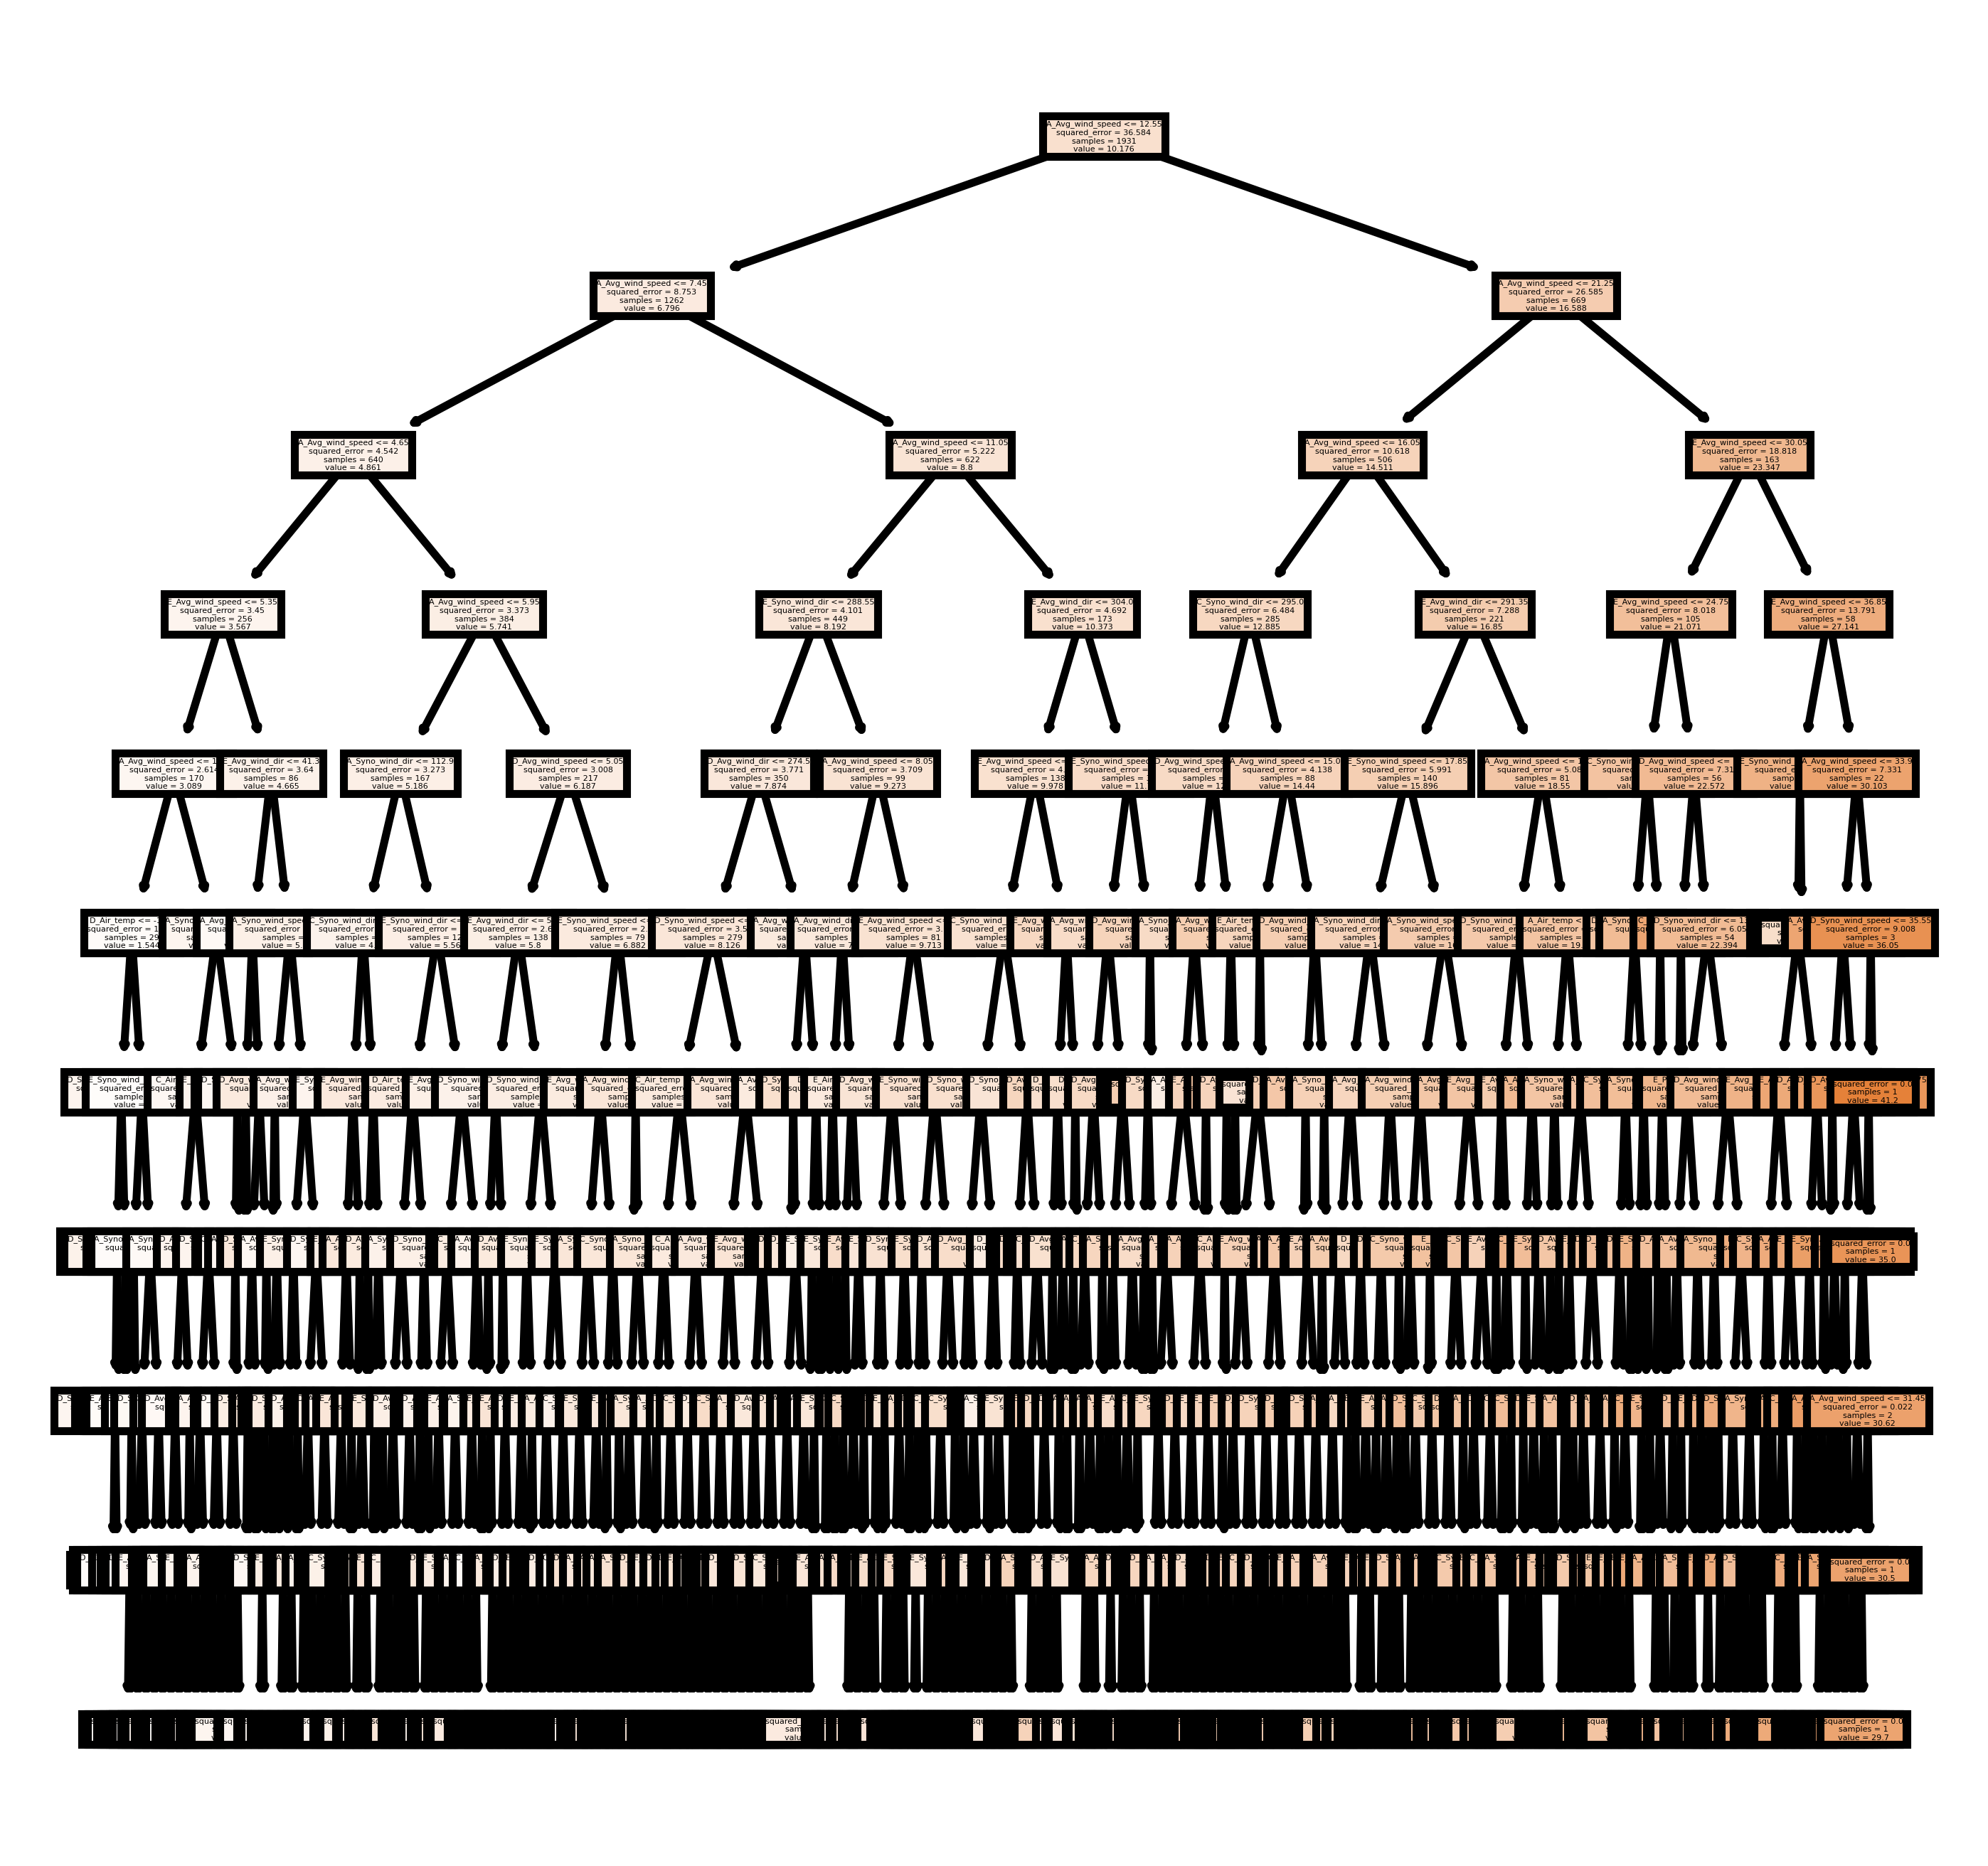

In [14]:
# Visulize the tree
# modified from source: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
fn = train_x.columns.tolist()
cn = train_y.columns.tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(rfr.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True)

NameError: name 'sns' is not defined

<Figure size 1500x1200 with 0 Axes>